# 4.10 Coding Etiquette and Excel Reporting

#### Please note, due to memory constraints we are using a 70% randomised and representative sample of the full data set for our analyses and visualisations. This subet was created in a previous exercise. 

###  Contents:

1. Importing libraries and files

2. Customer profile aggregation for usage frequency and expenditure. 

3. Customer profile comparison in regions and departments. 

4. Exporting updated dataframes and charts
    
   ** **

## 1. Importing libraries and files

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Path
path = r"C:\Users\Natalia\Documents\Instacart Basket Analysis"

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_project.pkl'))

In [4]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,region,exclusion_flag,age_category,income_flag,profile_age,profile_fam,department,alcohol_drinker,pet_owner,order_time_period
1,2398795,1,2,3,7,15.0,196,1,1,both,...,South,high-activity,Youth,Low,low-income married adult,low-income family,beverages,No,No,Early bird
4,431534,1,5,4,15,28.0,196,1,1,both,...,South,high-activity,Youth,Low,low-income married adult,low-income family,beverages,No,No,Regular
5,3367565,1,6,2,7,19.0,196,1,1,both,...,South,high-activity,Youth,Low,low-income married adult,low-income family,beverages,No,No,Early bird
7,3108588,1,8,1,14,14.0,196,2,1,both,...,South,high-activity,Youth,Low,low-income married adult,low-income family,beverages,No,No,Regular
8,2295261,1,9,1,16,0.0,196,4,1,both,...,South,high-activity,Youth,Low,low-income married adult,low-income family,beverages,No,No,Regular


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21675811 entries, 1 to 32404854
Data columns (total 41 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int32         
 1   user_id                 int32         
 2   order_number            int8          
 3   orders_day_of_week      int8          
 4   order_hour_of_day       int8          
 5   days_since_prior_order  float16       
 6   product_id              int32         
 7   add_to_cart_order       int16         
 8   reordered               int8          
 9   _merge                  category      
 10  product_name            category      
 11  aisle_id                int16         
 12  department_id           int8          
 13  prices                  float32       
 14  price_range_loc         category      
 15  busiest_days            category      
 16  busiest_period_of_day   category      
 17  max_order               int8          
 18  

In [6]:
df.shape

(21675811, 41)

## 2. Customer profile aggregation for usage frequency and expenditure

#### 2.1 Family and Department Spend

In [7]:
# Calculating the mode to see most usual values per column
print(df.groupby('profile_fam').agg(lambda x:x.value_counts().index[0]))

                           order_id  user_id  order_number  \
profile_fam                                                  
high-income family          2970392   182401             1   
high-income no dependants   1964908   176478             1   
low-income family           2648316     4694             1   
low-income no dependants     790903   129928             1   
mid-income family           1564244   201268             1   
mid-income no dependants    1737192    13701             1   

                           orders_day_of_week  order_hour_of_day  \
profile_fam                                                        
high-income family                          0                 10   
high-income no dependants                   0                 10   
low-income family                           1                 10   
low-income no dependants                    1                 10   
mid-income family                           0                 14   
mid-income no dependants   

In [8]:
# aggregating min, max, mean of prices and avg_days_since_last_order for all profiles
df.groupby('profile_fam').agg({'prices': ['mean', 'min', 'max'], 'days_since_prior_order': ['mean', 'min', 'max']})

prices               days_since_prior_order  \
                                mean  min      max                   mean   
profile_fam                                                                 
high-income family         19.955553  1.0  99999.0              10.796875   
high-income no dependants  20.175329  1.0  99999.0              10.656250   
low-income family           7.365240  1.0  14900.0              10.921875   
low-income no dependants    7.373742  1.0  14900.0              10.945312   
mid-income family           9.172406  1.0  99999.0              10.757812   
mid-income no dependants    9.417368  1.0  99999.0              10.781250   

                                      
                           min   max  
profile_fam                           
high-income family         0.0  30.0  
high-income no dependants  0.0  30.0  
low-income family          0.0  30.0  
low-income no dependants   0.0  30.0  
mid-income family          0.0  30.0  
mid-income no dependants   0.0  30.0

In [9]:
#show all columns
pd.set_option('display.max_columns', None)

In [10]:
ct_fam_dept = pd.crosstab(df['profile_fam'], df['department'], dropna = False)

([<matplotlib.axis.XTick at 0x25ee44a3be0>,
 [Text(0, 0, 'high-income\nfamily'),
  Text(1, 0, 'high-income\nno dependants'),
  Text(2, 0, 'low-income\nfamily'),
  Text(3, 0, 'low-income\nno dependants'),
  Text(4, 0, 'mid-income\nfamily'),
  Text(5, 0, 'mid-income\nno dependants')])

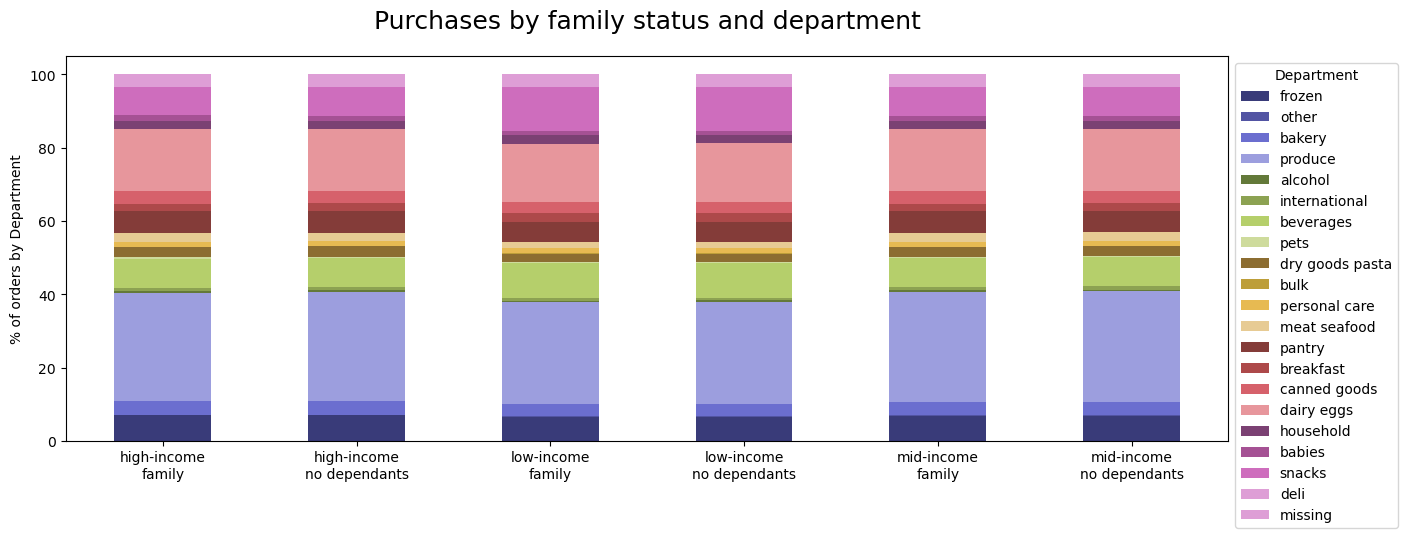

In [11]:
##### Creating stacked bar graph to plot profile for department
bar_profile_department = ct_fam_dept.loc[:,['frozen','other','bakery','produce','alcohol','international','beverages','pets','dry goods pasta','bulk','personal care','meat seafood','pantry','breakfast','canned goods','dairy eggs','household','babies','snacks','deli','missing']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=0, figsize=(15,5), colormap='tab20b').legend(title="Department", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of orders by Department")
plt.title ("Purchases by family status and department", fontsize = 18, pad=20)
plt.xticks([0,1,2,3,4,5],['high-income\nfamily','high-income\nno dependants','low-income\nfamily','low-income\nno dependants','mid-income\nfamily','mid-income\nno dependants'])


In [12]:
# comparing customer profiles and departments
ct_fam_dept2 = pd.crosstab(df['profile_fam'], df['department'], dropna = False, normalize = 'index')

In [13]:
ct_fam_dept2

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
profile_fam,,,,,,,,,,,,,,,,,,,,,
high-income family,0.004987,0.013851,0.037242,0.079398,0.021024,0.000960,0.034531,0.169491,0.032354,0.027656,0.069972,0.022927,0.008401,0.023973,0.002116,0.001119,0.059088,0.013748,0.003190,0.296519,0.077453
high-income no dependants,0.005378,0.013660,0.037360,0.080063,0.020654,0.000966,0.033325,0.169170,0.032486,0.027313,0.070012,0.022748,0.008426,0.022864,0.002011,0.001102,0.059205,0.013587,0.003489,0.297642,0.078538
low-income family,0.004684,0.011291,0.034260,0.094652,0.024065,0.001240,0.029101,0.159853,0.031895,0.023546,0.066331,0.023649,0.007548,0.017085,0.002071,0.001089,0.054368,0.013733,0.002833,0.276496,0.120210
low-income no dependants,0.004698,0.010828,0.034359,0.093758,0.023575,0.001094,0.029297,0.161429,0.032758,0.023478,0.066086,0.023242,0.007580,0.016916,0.002098,0.001171,0.054330,0.014240,0.002747,0.277573,0.118744
mid-income family,0.004362,0.013989,0.036548,0.077951,0.020714,0.001089,0.033828,0.170228,0.032572,0.027813,0.069062,0.022090,0.008573,0.023654,0.002122,0.001106,0.058749,0.013615,0.002954,0.301155,0.077827
mid-income no dependants,0.004331,0.014697,0.036851,0.079027,0.020563,0.001044,0.033813,0.169977,0.032843,0.027629,0.068904,0.020954,0.008707,0.023458,0.002028,0.001100,0.058006,0.013461,0.002930,0.302150,0.077528


#### 2.2 Order time of day and Department 

In [14]:
#looking at departmental spending by order time habit
crosstab_dpt_time = pd.crosstab(df['department'], df['order_time_period'], dropna = False)

In [15]:
crosstab_dpt_time

order_time_period,Early bird,Night owl,Regular
department,,,
alcohol,5517,23441,72119
babies,35188,74338,177339
bakery,75602,196511,511942
beverages,161947,444510,1194334
breakfast,48056,118191,303042
bulk,2156,6016,15198
canned goods,61484,177016,469371
dairy eggs,360616,912026,2351817
deli,62590,180553,459565


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

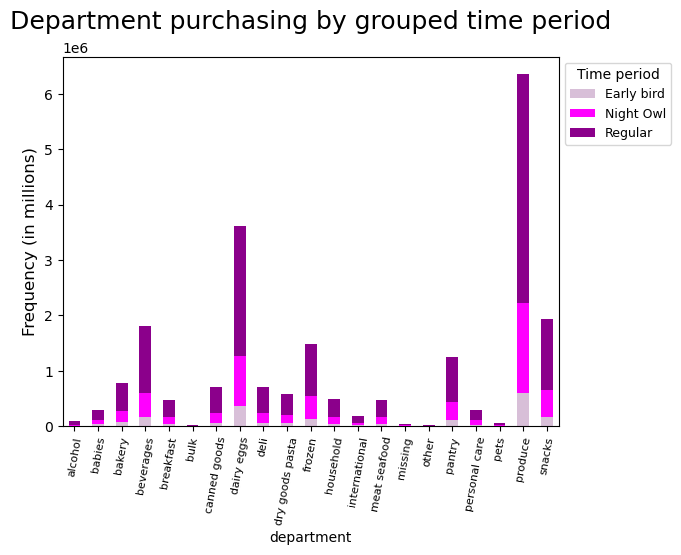

In [16]:
bar_dept_time = crosstab_dpt_time.plot(kind = 'bar', stacked = True, color =['thistle','magenta','darkmagenta'])
bar_dept_time.legend(title='Time period', bbox_to_anchor=(1.0,1.0), loc='upper left', labels=['Early bird', 'Night Owl', 'Regular'], fontsize = 9)
plt.title('Department purchasing by grouped time period', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)

#### 2.3 Family status and region

In [17]:
#comparing different profiles by region
crosstab_region = pd.crosstab(df['profile_fam'], df['region'], dropna = False)

In [18]:
crosstab_region

region,Midwest,Northeast,South,West
profile_fam,,,,
high-income family,1142181,859717,1577506,1221133
high-income no dependants,390481,281522,539171,414282
low-income family,1044421,772560,1492316,1162498
low-income no dependants,337791,268824,502181,384247
mid-income family,1621049,1245943,2339439,1777665
mid-income no dependants,548144,398243,766390,588107


In [19]:
#comparing different profiles by region
crosstab_region2 = pd.crosstab(df['profile_fam'], df['region'], normalize = 'index')

In [20]:
crosstab_region2

region,Midwest,Northeast,South,West
profile_fam,,,,
high-income family,0.237928,0.179088,0.328610,0.254374
high-income no dependants,0.240229,0.173196,0.331704,0.254871
low-income family,0.233557,0.172763,0.333717,0.259962
low-income no dependants,0.226243,0.180051,0.336347,0.257358
mid-income family,0.232106,0.178397,0.334967,0.254530
mid-income no dependants,0.238232,0.173083,0.333085,0.255600


([<matplotlib.axis.XTick at 0x25ee50035b0>,
 [Text(0, 0, 'high-income\nfamily'),
  Text(1, 0, 'high-income\nno dependants'),
  Text(2, 0, 'low-income\nfamily'),
  Text(3, 0, 'low-income\nno dependants'),
  Text(4, 0, 'mid-income\nfamily'),
  Text(5, 0, 'mid-income\nno dependants')])

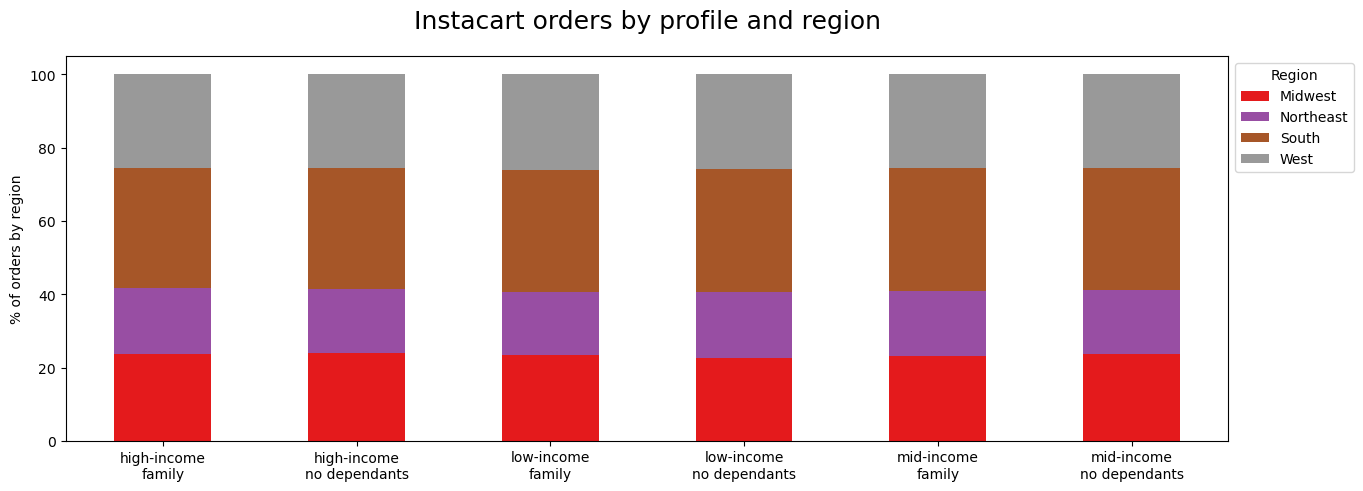

In [21]:
# Creating stacked bar graph to plot profile for regions
bar_profile_region = crosstab_region.loc[:,['Midwest','Northeast','South','West']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=0, figsize=(15,5), colormap='Set1').legend(title="Region", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of orders by region")
plt.title ("Instacart orders by profile and region", fontsize = 18, pad=20)
plt.xticks([0,1,2,3,4,5],['high-income\nfamily','high-income\nno dependants','low-income\nfamily','low-income\nno dependants','mid-income\nfamily','mid-income\nno dependants'])


### 3. Customer Profiling and Regions and Departments 

#### 3.1 Department and grouped price ranges

In [22]:
#comparing price ranges and departments
crosstab_price_dpt = pd.crosstab(df['department'], df['price_range_loc'], dropna = False)

In [23]:
crosstab_price_dpt

price_range_loc,High-range product,Low_range product,Mid-range product
department,,,
alcohol,0,23145,77932
babies,0,84922,201943
bakery,0,192496,591559
beverages,0,570159,1230632
breakfast,0,146163,323126
bulk,0,834,22536
canned goods,0,197329,510542
dairy eggs,3402,959556,2661501
deli,0,209282,493426


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

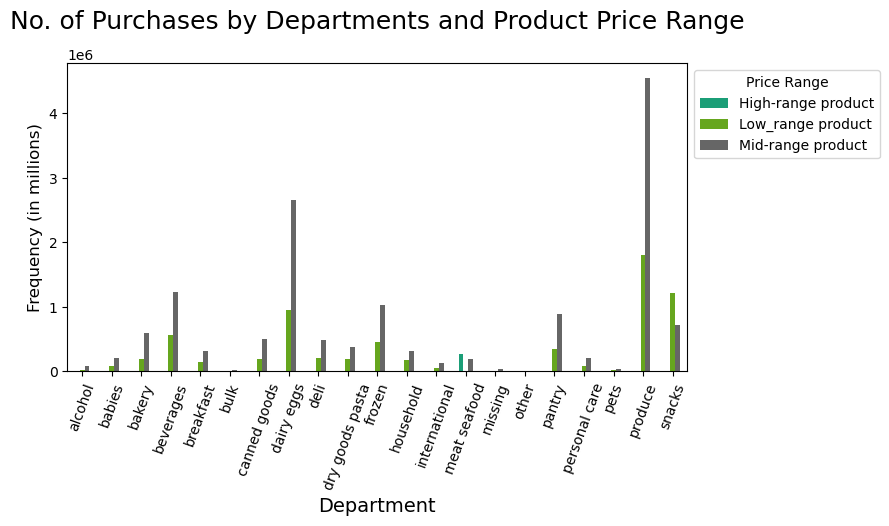

In [24]:
bar_crosstab_price_dpt = crosstab_price_dpt.plot(kind = 'bar', figsize=(8,4), rot = 0, colormap='Dark2').legend(title="Price Range", bbox_to_anchor=(1.0,1.0))
plt.title('No. of Purchases by Departments and Product Price Range', fontsize = 18, pad=25)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Department',  fontsize = 14)
plt.xticks(rotation=70)

#### 3.2 Department and loyalty status

In [25]:
#comparing loyalty status and departments
crosstab_loyalty_dpt = pd.crosstab(df['department'], df['loyalty_flag'], dropna = False)

In [26]:
crosstab_loyalty_dpt

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,27153,19980,53944
babies,116792,32538,137535
bakery,265794,120249,398012
beverages,598729,277776,924286
breakfast,155218,74305,239766
bulk,9632,2967,10771
canned goods,205631,126006,376234
dairy eggs,1281559,525235,1817665
deli,226662,110921,365125


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

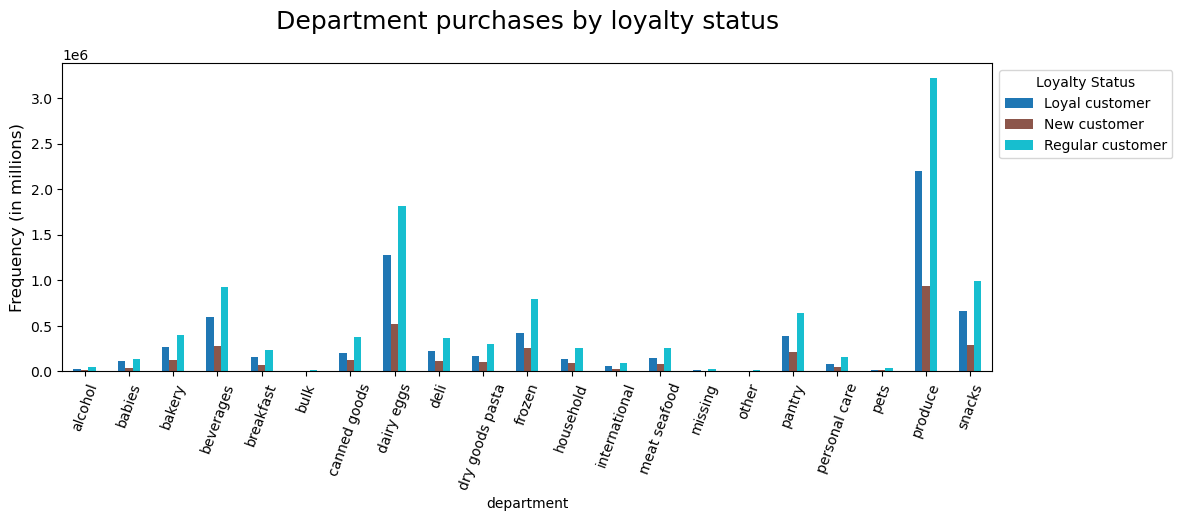

In [27]:
bar_crosstab_loyal_dpt = crosstab_loyalty_dpt.plot(kind = 'bar', figsize=(12,4), rot = 0, colormap='tab10').legend(title="Loyalty Status", bbox_to_anchor=(1.0,1.0))
plt.title('Department purchases by loyalty status', fontsize = 18, pad=25)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xticks(rotation=70)

#### 3.3 Region and loyalty status

In [28]:
#comparing regions and loyalty status
crosstab_region_loyalty = pd.crosstab(df['region'], df['loyalty_flag'], dropna = False)

In [29]:
crosstab_region_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,1661598,795763,2626706
Northeast,1291108,589145,1946556
South,2384591,1114816,3717596
West,1863223,861423,2823286


Text(0.5, 0, 'Region')

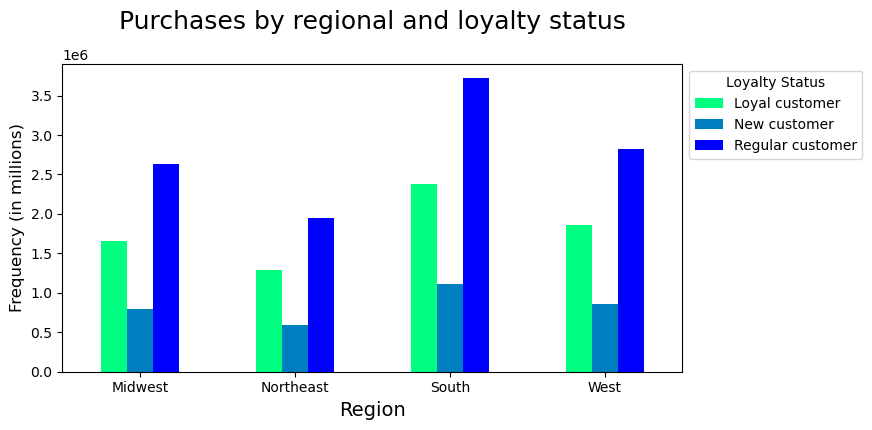

In [30]:
bar_crosstab_loyal_region = crosstab_region_loyalty.plot(kind = 'bar', figsize=(8,4), rot = 0, colormap='winter_r').legend(title="Loyalty Status", bbox_to_anchor=(1.0,1.0))
plt.title('Purchases by regional and loyalty status', fontsize = 18, pad=25)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 14)



#### 3.4 Region and loyalty status

In [31]:
#comparing regions and loyalty status
crosstab_region_loyalty_normalize = pd.crosstab(df['region'], df['loyalty_flag'], dropna = False, normalize = 'index')

In [32]:
crosstab_region_loyalty_normalize

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,0.326825,0.156521,0.516654
Northeast,0.337385,0.153952,0.508663
South,0.330413,0.154471,0.515116
West,0.335841,0.155269,0.508890


Text(0.5, 0, 'Region')

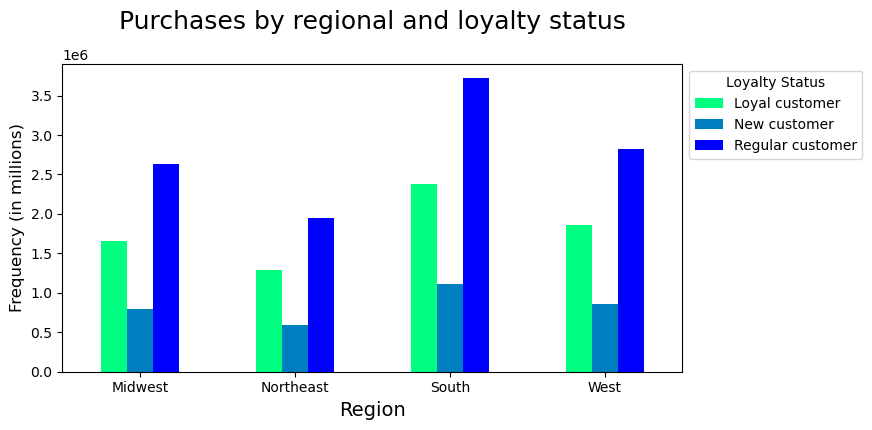

In [33]:
bar_crosstab_loyal_region_normalize = crosstab_region_loyalty.plot(kind = 'bar', figsize=(8,4), rot = 0, colormap='winter_r').legend(title="Loyalty Status", bbox_to_anchor=(1.0,1.0))
plt.title('Purchases by regional and loyalty status', fontsize = 18, pad=25)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 14)

#### 3.5 Region and grouped price  

In [34]:
#comparing regions and product price range
crosstab_region_price = pd.crosstab(df['region'], df['price_range_loc'], dropna = False)

In [35]:
crosstab_region_price

price_range_loc,High-range product,Low_range product,Mid-range product
region,,,
Midwest,65440,1586911,3431716
Northeast,48930,1199428,2578451
South,92881,2252355,4871767
West,71710,1733653,3742569


Text(0, 0.5, 'No. purchases (in millions)')

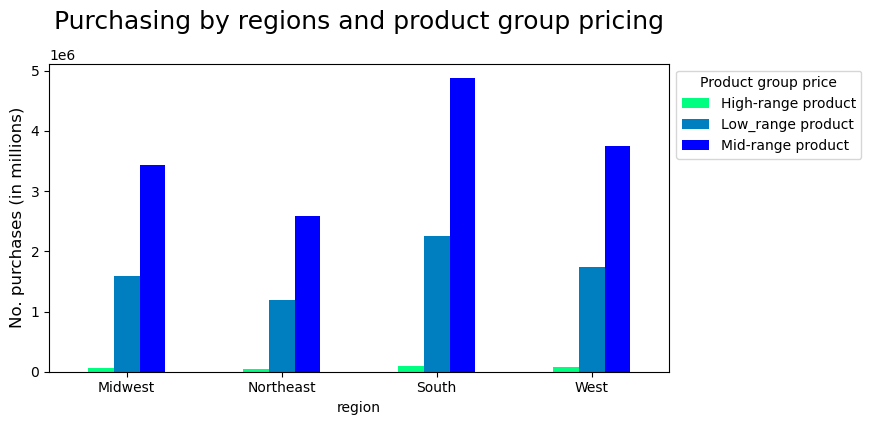

In [36]:
bar_crosstab_region_price = crosstab_region_price.plot(kind = 'bar', figsize=(8,4), rot = 0, colormap='winter_r').legend(title="Product group price", bbox_to_anchor=(1.0,1.0))
plt.title('Purchasing by regions and product group pricing', fontsize = 18, pad=25)
plt.ylabel('No. purchases (in millions)', fontsize = 12)


#### 3.6 Region and income

In [37]:
#comparing region and income
crosstab_income_region = pd.crosstab(df['region'], df['income_flag'], dropna = False)

In [38]:
crosstab_income_region

income_flag,High,Low,Middle
region,,,
Midwest,1532662,1382212,2169193
Northeast,1141239,1041384,1644186
South,2116677,1994497,3105829
West,1635415,1546745,2365772


Text(0.5, 0, '')

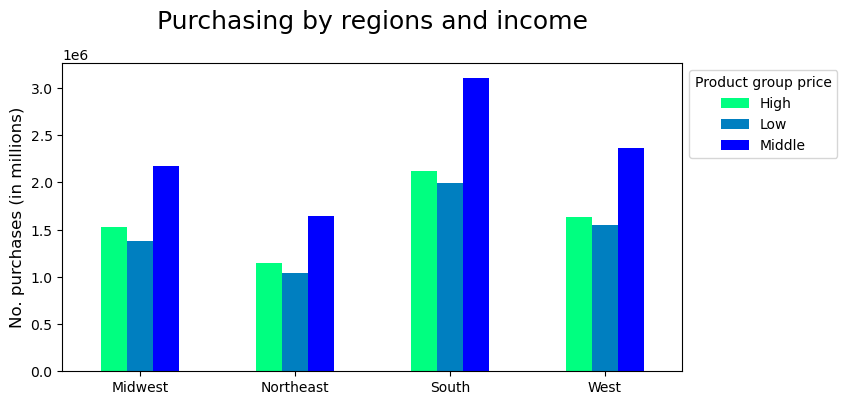

In [39]:
bar_crosstab_region_income = crosstab_income_region.plot(kind = 'bar', figsize=(8,4), rot = 0, colormap='winter_r').legend(title="Product group price", bbox_to_anchor=(1.0,1.0))
plt.title('Purchasing by regions and income', fontsize = 18, pad=25)
plt.ylabel('No. purchases (in millions)', fontsize = 12)
plt.xlabel('')

#### 3.6 Income and day of week

In [40]:
#comparing region and income
crosstab_income_day = pd.crosstab(df['income_flag'], df['orders_day_of_week'], dropna = False)

In [41]:
crosstab_income_day

orders_day_of_week,0,1,2,3,4,5,6
income_flag,,,,,,,
High,1253870,1096900,826059,758779,749231,826251,914903
Low,1050471,1103694,800557,725054,717411,801750,765901
Middle,1830829,1588868,1190832,1084682,1070929,1195694,1323146


Text(0.5, 0, 'Income')

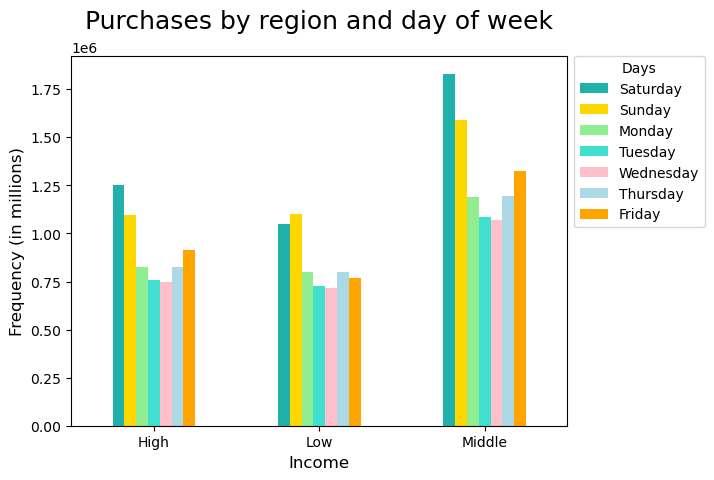

In [42]:
bar_income_day = crosstab_income_day.plot(kind = 'bar', rot = 0, color= ['lightseagreen', 'gold', 'lightgreen', 'turquoise', 'pink', 'lightblue', 'orange'])
bar_income_day.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Purchases by region and day of week', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Income',  fontsize = 12)

## 4. Exporting Dataframe

#### Dataframe

In [43]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_project2.pkl'))

#### Visuals

In [44]:
bar_profile_department.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_profile_department.06.png'))

In [45]:
bar_dept_time.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_profile_regio.06.png'))

In [46]:
bar_profile_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_profile_region.06.png'))

In [47]:
bar_crosstab_price_dpt.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_crosstab_price_dpt.06.png'))

In [48]:
bar_crosstab_loyal_dpt.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_crosstab_loyal_dpt.06.png'))

In [49]:
bar_crosstab_loyal_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_crosstab_loyal_region.06.png'))

In [50]:
bar_crosstab_region_price.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_crosstab_region_price.06.png'))

In [51]:
bar_income_day.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_income_day.06.png'))